<a href="https://colab.research.google.com/github/ttcielott/geospatial_visualization_london_property/blob/main/London_Property_Market_Trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data source:
https://data.london.gov.uk/dataset/average-house-prices
<br>
https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
! pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 12.5 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
# download the average house price of bourough in UK

re = requests.get("https://data.london.gov.uk/download/average-house-prices/f01b1cc7-6daa-4256-bd6c-94d8c83ee000/land-registry-house-prices-borough.xls")
open('avg_house_price.xls', 'wb').write(re.content)

949248

In [ ]:
df = pd.read_excel('avg_house_price.xls', sheet_name = 'Median')
df.head()

,Code,Area,Year ending Dec 1995,Year ending Mar 1996,Year ending Jun 1996,Year ending Sep 1996,Year ending Dec 1996,Year ending Mar 1997,Year ending Jun 1997,Year ending Sep 1997,...,Year ending Sep 2015,Year ending Dec 2015,Year ending Mar 2016,Year ending Jun 2016,Year ending Sep 2016,Year ending Dec 2016,Year ending Mar 2017,Year ending Jun 2017,Year ending Sep 2017,Year ending Dec 2017
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000001,City of London,105000.0,112500.0,112375.0,121500.0,124250.0,126502.5,130000.0,130000.0,...,823750.0,799999.5,795000.0,799750.0,800000.0,831400.0,831400.0,812500.0,835000.0,835000.0
2,E09000002,Barking and Dagenham,49000.0,49995.0,50000.0,49995.0,49995.0,49950.0,50000.0,52000.0,...,235000.0,245500.0,255000.0,265000.0,277000.0,290000.0,300000.0,302000.0,302000.0,300000.0
3,E09000003,Barnet,85125.0,85000.0,85000.0,85500.0,87000.0,89500.0,91950.0,95000.0,...,440000.0,450000.0,455000.0,460000.0,470000.0,476500.0,482950.5,500000.0,512000.0,533500.0
4,E09000004,Bexley,62000.0,62000.0,63125.0,63500.0,65000.0,67000.0,68500.0,70000.0,...,271000.0,285000.0,295000.0,310000.0,322000.0,328000.0,330000.0,332000.0,336000.0,342500.0


In [ ]:
df.drop(index = 0, inplace = True)

In [ ]:
df.head()

,Code,Area,Year ending Dec 1995,Year ending Mar 1996,Year ending Jun 1996,Year ending Sep 1996,Year ending Dec 1996,Year ending Mar 1997,Year ending Jun 1997,Year ending Sep 1997,...,Year ending Sep 2015,Year ending Dec 2015,Year ending Mar 2016,Year ending Jun 2016,Year ending Sep 2016,Year ending Dec 2016,Year ending Mar 2017,Year ending Jun 2017,Year ending Sep 2017,Year ending Dec 2017
1,E09000001,City of London,105000.0,112500.0,112375.0,121500.0,124250.0,126502.5,130000.0,130000.0,...,823750.0,799999.5,795000.0,799750.0,800000.0,831400.0,831400.0,812500.0,835000.0,835000.0
2,E09000002,Barking and Dagenham,49000.0,49995.0,50000.0,49995.0,49995.0,49950.0,50000.0,52000.0,...,235000.0,245500.0,255000.0,265000.0,277000.0,290000.0,300000.0,302000.0,302000.0,300000.0
3,E09000003,Barnet,85125.0,85000.0,85000.0,85500.0,87000.0,89500.0,91950.0,95000.0,...,440000.0,450000.0,455000.0,460000.0,470000.0,476500.0,482950.5,500000.0,512000.0,533500.0
4,E09000004,Bexley,62000.0,62000.0,63125.0,63500.0,65000.0,67000.0,68500.0,70000.0,...,271000.0,285000.0,295000.0,310000.0,322000.0,328000.0,330000.0,332000.0,336000.0,342500.0
5,E09000005,Brent,68000.0,69000.0,70000.0,71000.0,73000.0,75000.0,76000.0,80000.0,...,400000.0,415000.0,425000.0,425000.0,450000.0,445000.0,450000.0,465150.0,475000.0,499950.0


In [ ]:
# download the key GIS boundary files
re2 = requests.get('https://data.london.gov.uk/download/statistical-gis-boundary-files-london/9ba8c833-6370-4b11-abdc-314aa020d5e0/statistical-gis-boundaries-london.zip')
open('gis.zip', 'wb').write(re2.content)

28666674

In [ ]:
!unzip gis.zip

Archive:  gis.zip
   creating: statistical-gis-boundaries-london/ESRI/
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.dbf  
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.GSS_CODE.atx  
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.NAME.atx  
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.prj  
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.sbn  
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.sbx  
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp  
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp.xml  
  inflating: statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shx  
  inflating: statistical-gis-boundaries-london/ESRI/London_Ward.BOROUGH.atx  
 extracting: statistical-gis-boundaries-london/ESR

In [ ]:
! ls

avg_house_price.xls  gis.zip  sample_data  statistical-gis-boundaries-london


In [ ]:
! cd statistical-gis-boundaries-london && ls && cd ESRI && ls

ESRI  Geography-licensing.pdf  MapInfo
London_Borough_Excluding_MHW.dbf
London_Borough_Excluding_MHW.GSS_CODE.atx
London_Borough_Excluding_MHW.NAME.atx
London_Borough_Excluding_MHW.prj
London_Borough_Excluding_MHW.sbn
London_Borough_Excluding_MHW.sbx
London_Borough_Excluding_MHW.shp
London_Borough_Excluding_MHW.shp.xml
London_Borough_Excluding_MHW.shx
London_Ward.BOROUGH.atx
London_Ward_CityMerged.BOROUGH.atx
London_Ward_CityMerged.cpg
London_Ward_CityMerged.dbf
London_Ward_CityMerged.GSS_CODE.atx
London_Ward_CityMerged.LB_GSS_CD.atx
London_Ward_CityMerged.prj
London_Ward_CityMerged.sbn
London_Ward_CityMerged.sbx
London_Ward_CityMerged.shp
London_Ward_CityMerged.shp.xml
London_Ward_CityMerged.shx
London_Ward.cpg
London_Ward.dbf
London_Ward.GSS_CODE.atx
London_Ward.LB_GSS_CD.atx
London_Ward.prj
London_Ward.sbn
London_Ward.sbx
London_Ward.shp
London_Ward.shp.xml
London_Ward.shx
LSOA_2004_London_Low_Resolution.dbf
LSOA_2004_London_Low_Resolution.prj
LSOA_2004_London_Low_Resolution.shp
LSO

In [ ]:
# read shapefile with geopandas into GeoDatafrmae
gpd_df = gpd.read_file('statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')
gpd_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18..."


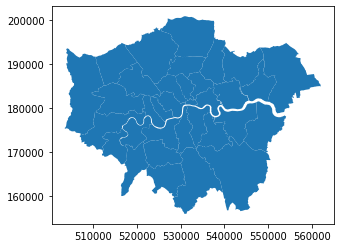

In [ ]:
# plot GeoDataFrame
gpd_df.plot()
plt.show()

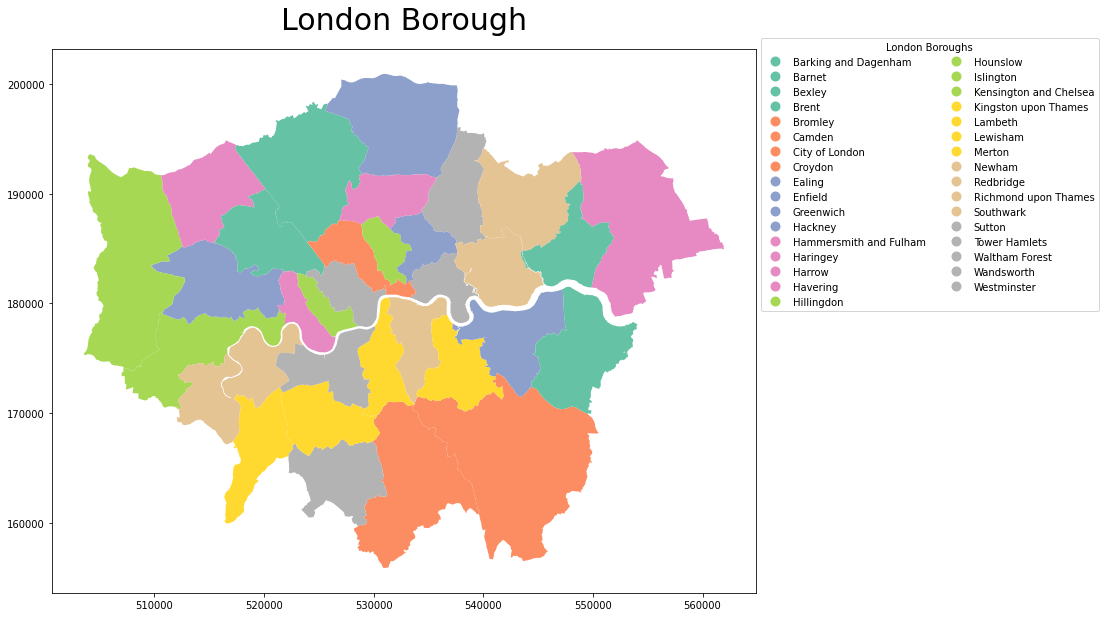

In [ ]:
# plot GeoDataFrame with coloring of each boroughs
# plot shapefile polygons

# set legend display
leg_kwds = {'title': 'London Boroughs',
            'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 
            'ncol': 2}
gpd_df.plot(column = 'NAME', legend = True, figsize = (20, 10), cmap = 'Set2', legend_kwds = leg_kwds)
plt.title('London Borough', fontdict = {'fontsize': 30}, pad = 20)
plt.show()

In [ ]:
# view ward-base shapefile as well

gpd_ward = gpd.read_file('statistical-gis-boundaries-london/ESRI/London_Ward_CityMerged.shp')

gpd_ward.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16..."
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16..."
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16..."
4,Beverley,E05000402,187.821,0.0,E09000021,Kingston upon Thames,117161,"POLYGON ((522071.000 168144.900, 522063.900 16..."


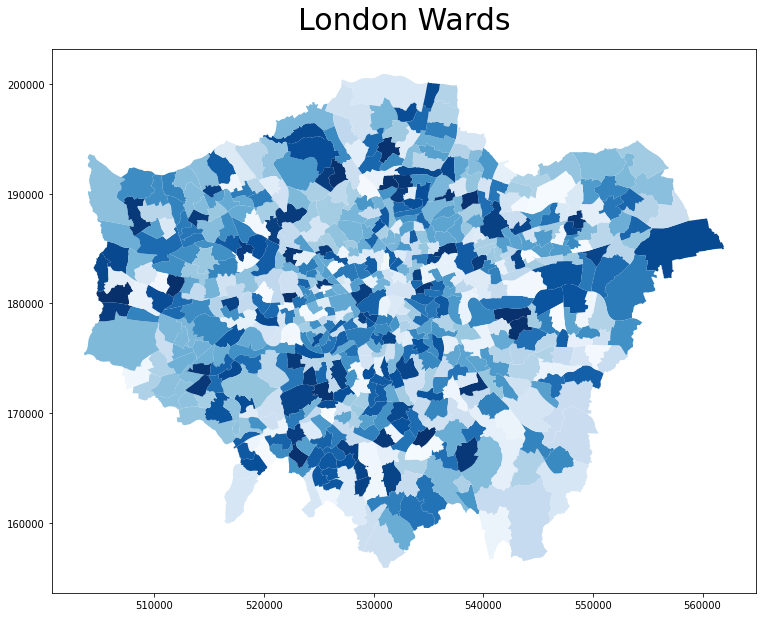

In [ ]:
# plot GeoDataFrame 
# plot shapefile polygons
gpd_ward.plot(column = 'NAME', cmap = 'Blues', figsize= (20, 10))
plt.title('London Wards' , fontdict = {'fontsize': 30}, pad = 20)
plt.show()

In [ ]:
# get location dataset
re3 = requests.get('https://data.london.gov.uk/download/london-schools-atlas/57046151-39a0-45d9-8dc0-27ea7fd02de8/all_schools_xy_2016.csv')
open('schools.csv', 'wb').write(re3.content)

938049

In [ ]:
schools = pd.read_csv('schools.csv')
schools.head()

,OBJECTID,URN,SCHOOL_NAM,TYPE,PHASE,ADDRESS,TOWN,POSTCODE,STATUS,GENDER,...,LA_NAME,WEBLINK,AGE,map_icon,NEW_URN,OLD_URN,map_icon_l,Primary,x,y
0,1,135155,Ayesha Siddiqa Girls School,Other Independent School,Not applicable,165-169 The Broadway,Southall,UB1 1LR,Open,Girls,...,Ealing,,19-Nov,,,,2,0,-0.378496,51.507500
1,2,140492,Beis Medrash Elyon,Other Independent School,Not applicable,233 West Hendon Broadway,London,NW9 7DG,Open,Boys,...,Barnet,,16-Nov,,,,2,0,-0.241628,51.578999
2,3,141411,Big Creative Independent School,Other Independent School,Not applicable,Silver Birch House,Walthamstow,E17 5SD,Open,Mixed,...,Waltham Forest,,15 - 16,,,,2,0,-0.042590,51.594002
3,4,142336,Wetherby Senior School,Other Independent School,Not applicable,100 Marylebone Lane,London,W1U 2QB,Open,Boys,...,Westminster,,16-Nov,,,,2,0,-0.150409,51.517601
4,5,100042,St Mary's Kilburn Church of England Primary Sc...,Voluntary Aided School,Primary,Quex Road,London,NW6 4PG,Open,Mixed,...,Camden,http://www.stmarykilburn.camden.sch.uk/,11-Mar,VOLUNTARY,,,2,1,-0.193367,51.540402


In [ ]:
schools.columns

Index(['OBJECTID', 'URN', 'SCHOOL_NAM', 'TYPE', 'PHASE', 'ADDRESS', 'TOWN',
       'POSTCODE', 'STATUS', 'GENDER', 'EASTING', 'NORTHING', 'WARD_NAME',
       'LSOA_NAME', 'LA_NAME', 'WEBLINK', 'AGE', 'map_icon', 'NEW_URN',
       'OLD_URN', 'map_icon_l', 'Primary', 'x', 'y'],
      dtype='object')

In [ ]:
schools.PHASE.unique()

array(['Not applicable', 'Primary', 'Secondary', 'All Through',
       'Middle Deemed Secondary'], dtype=object)

In [ ]:
schools.STATUS.unique()

array(['Open', 'Closed', 'Open, but proposed to close'], dtype=object)

**Creating the function that you can map the coordinates** 
by attribute such as type, phase, and gender.

In [ ]:
def filter_by(df, column_name, filter_content:list):
  # filter dataframe by condition
  filtered_df= df[df[column_name].isin(filter_content)]
  
  # plot location
  gpd_df.plot(column = 'NAME')
  plt.scatter(x= filtered_df.EASTING, y = filtered_df.NORTHING, c = 'black', edgecolors = 'white')
  plt.show()

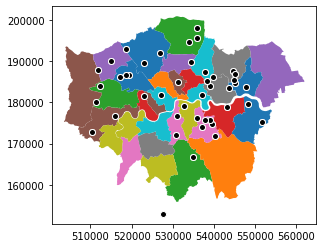

In [ ]:
filter_by(schools, 'PHASE', ['All Through'])

**Projections**
<br>
Map projections are necessary for representing the earth in 2-dimensional space.
<br><br>
* The most common projection is Mercator
* A variation of Mercator is WGS84 (which is short for World Geodetic System 1984)
* WGS84 is used in most mapping apps and the Global Positioning System, or GPS.
<br>

!['xkcd illustration on map projections'](http://i.imgur.com/1ev1X.png)

**Coordinate Reference System (CRS)**
<br>
Setting a CRS for GeoDataFrame tells geopandas how to interpret the longitude and latitude coordinates and distance unit.
<br>
* Most common CRS : EPSG:4326 and EPSG:3857, both use WGS84 system.
>* EPSG:4326 used by Google Earth, unit: Decimal degree
>* EPSG:3857 used by Google Maps, Bing Maps, Open Street Maps, unit: meters
>* EPSG stands for European Petroleum Survey Group, the entity developed these systems.

In [ ]:
# view the current CRS
gpd_df.crs

<Derived Projected CRS: PROJCS["OSGB36 / British National Grid",GEOGCS["OS ...>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [ ]:
# conver OSGB36 to WGS84 system
gpd_df_W = gpd_df.to_crs(epsg = 4326)
gpd_df_W.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich


**GeoDataFrame & Geometry**
* Geometry is a special data structure.
* It is a required component for GeoDataFrames.
* We can create geometry column using shapely python package.

In [ ]:
# create a point geometry column
from shapely.geometry import Point
schools['geometry'] = schools.apply(lambda x: Point((x.x, x.y)), axis = 1)
schools.geometry

0        POINT (-0.378496 51.5074997)
1        POINT (-0.241628 51.5789986)
2       POINT (-0.0425897 51.5940018)
3         POINT (-0.150409 51.517601)
4        POINT (-0.193367 51.5404015)
                    ...              
3884     POINT (0.0178413 51.5339012)
3885      POINT (0.117722 51.3699989)
3886      POINT (0.117722 51.3699989)
3887      POINT (0.006027 51.5600014)
3888     POINT (-0.080438 51.3843002)
Name: geometry, Length: 3889, dtype: object

**Creating GeoDataFrame from DataFrame**
<br>
We can use GeoDataFrame constructor.

In [ ]:
# create GeoDataFrame from DataFrame
schools_crs = 'epsg:4326'
schools_geo = gpd.GeoDataFrame(schools,
                              crs = schools_crs,
                              geometry = schools.geometry)

In [ ]:
# check if the GeoDataFrame is created
type(schools_geo)

geopandas.geodataframe.GeoDataFrame

In [ ]:
schools_geo.head()

,OBJECTID,URN,SCHOOL_NAM,TYPE,PHASE,ADDRESS,TOWN,POSTCODE,STATUS,GENDER,...,WEBLINK,AGE,map_icon,NEW_URN,OLD_URN,map_icon_l,Primary,x,y,geometry
0,1,135155,Ayesha Siddiqa Girls School,Other Independent School,Not applicable,165-169 The Broadway,Southall,UB1 1LR,Open,Girls,...,,19-Nov,,,,2,0,-0.378496,51.507500,POINT (-0.37850 51.50750)
1,2,140492,Beis Medrash Elyon,Other Independent School,Not applicable,233 West Hendon Broadway,London,NW9 7DG,Open,Boys,...,,16-Nov,,,,2,0,-0.241628,51.578999,POINT (-0.24163 51.57900)
2,3,141411,Big Creative Independent School,Other Independent School,Not applicable,Silver Birch House,Walthamstow,E17 5SD,Open,Mixed,...,,15 - 16,,,,2,0,-0.042590,51.594002,POINT (-0.04259 51.59400)
3,4,142336,Wetherby Senior School,Other Independent School,Not applicable,100 Marylebone Lane,London,W1U 2QB,Open,Boys,...,,16-Nov,,,,2,0,-0.150409,51.517601,POINT (-0.15041 51.51760)
4,5,100042,St Mary's Kilburn Church of England Primary Sc...,Voluntary Aided School,Primary,Quex Road,London,NW6 4PG,Open,Mixed,...,http://www.stmarykilburn.camden.sch.uk/,11-Mar,VOLUNTARY,,,2,1,-0.193367,51.540402,POINT (-0.19337 51.54040)


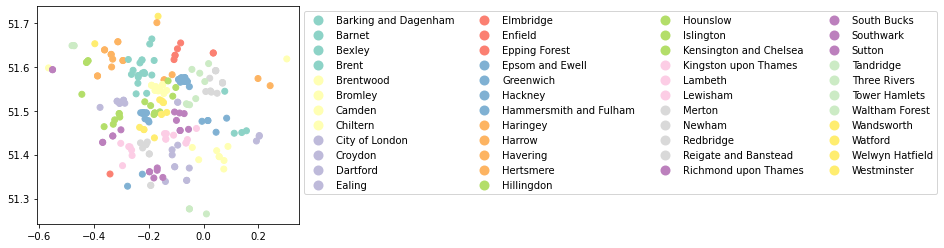

In [ ]:
# display points of girls schools by LA_NAME
schools_geo[school_geo['GENDER'] == 'Girls'].plot(column = 'LA_NAME', 
                                                  cmap = 'Set3', 
                                                  legend = True, 
                                                  legend_kwds = {'bbox_to_anchor': (1, 1), 'ncol': 4})